### Talbot carpet

This code makes a plot of a **Talbot carpet**, named after 
<a href = "https://en.wikipedia.org/wiki/Henry_Fox_Talbot">Henry Fox Talbot</a> (Feb 11, 1800 - Sept 17, 1877),
who observed the effect in 1836. 
The physics is identical to $N$-slit, where $N$ is relatively large. The Talbot carpet is formed
in the near-field of the grating. To model the near field we use the Fresnel integrals, see
<a href = "https://global.oup.com/academic/product/optics-f2f-9780198786795?cc=gb&lang=en&">Optics f2f</a> Sec. 5.10.

The code allows us to vary both the width of each slit $a$ and the spacing between them $d$.

<div class="interactive-start" onclick="initInteractiveCode()" title="This runs Python in your browser, allowing you local calculations">CLICK HERE TO ACTIVATE CODE CELLS</div>


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import matplotlib.colors as colors
from numpy.fft import fft, ifft, fftshift

import matplotlib.colors as colors
import matplotlib.patches as mpatches

import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams["text.latex.preamble"]  = r"\usepackage{amsmath} \usepackage{amssymb} \usepackage[bitstream-charter]{mathdesign}"
mpl.rcParams["text.usetex"] = True

from scipy.special import fresnel


This cell sets up a grid, defines the Fresnel integrals, and fills an intensity map in the array H. Here we have
chosen $d/a = 20$, but we can change this. See below.

In [2]:
start_time = time.time()

xmax=20.0 
dx=0.1 
x = np.arange(-xmax,xmax,dx)

num=8*314 # number of steps in z direction
dim=np.size(x)
H=np. zeros((num,dim))

a=1.0
off1=10.0 # spacing between slits

nslits=48

def fresnel_integrals(jj):
    c1=fresnel(sa/2-(2*jj+1)*soff1-sx)[0]
    c2=fresnel(-sa/2-(2*jj+1)*soff1-sx)[0]
    s1=fresnel(sa/2-(2*jj+1)*soff1-sx)[1]
    s2=fresnel(-sa/2-(2*jj+1)*soff1-sx)[1]
    c3=fresnel(sa/2+(2*jj+1)*soff1-sx)[0]
    c4=fresnel(-sa/2+(2*jj+1)*soff1-sx)[0]
    s3=fresnel(sa/2+(2*jj+1)*soff1-sx)[1]
    s4=fresnel(-sa/2+(2*jj+1)*soff1-sx)[1] 
    return c1-c2+c3-c4, s1-s2+s3-s4

for ii in range (0,num):
    z=0.5*ii+0.01
    sa=a/np.sqrt(z/np.pi)
    sx=x/np.sqrt(z/np.pi)
    soff1=off1/np.sqrt(z/np.pi)
    c_tot, s_tot = fresnel_integrals(0)    
    for jj in range (1,nslits):
        c, s = fresnel_integrals(jj)
        c_tot += c
        s_tot += s        
    intensity=0.5*(c_tot*c_tot+s_tot*s_tot)
    H[ii,:]+=intensity

R = np.zeros((num,dim))
G = np.zeros((num,dim))
B = np.zeros((num,dim))

G += H
B += H

br=5.0
bg=5.0 
bb=5.0 

R=np.clip(br*R,0.0,1.0)
G=np.clip(bg*G,0.0,1.0)
B=np.clip(bb*B,0.0,1.0)
RGB=np.dstack((np.flipud(R.T), np.flipud(G.T), np.flipud(B.T))) # use transpose to swap image axes, flipud to origin at bottom left
print("--- %s seconds ---" % (time.time() - start_time))

--- 21.094162940979004 seconds ---


In this cell, we plot am image of the array H.

--- 0.0553131103515625 seconds ---


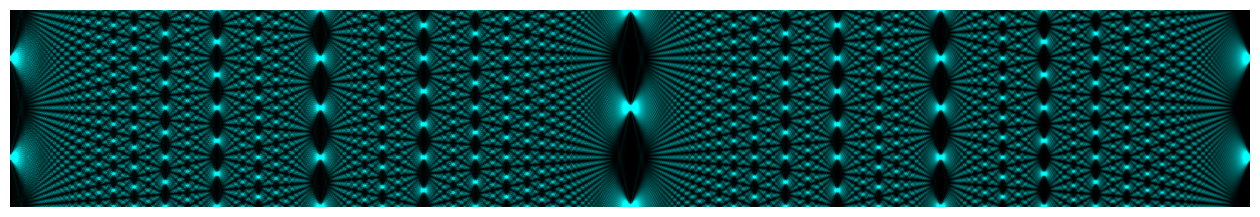

In [3]:
start_time = time.time()
fig, ax = plt.subplots(1,1,figsize=(16, 16),dpi=100)

ax.imshow(RGB)
ax.set_axis_off()
print("--- %s seconds ---" % (time.time() - start_time))

In [4]:
fig.savefig('Talbot.png',bbox_inches='tight')

Fianlly, let's repeat the simulation for the case $d/a=2$, a **Ronchi grating**.

In [5]:
start_time = time.time()

xmax=20.0 
dx=0.1 
x = np.arange(-xmax,xmax,dx)

num=8*314 # number of steps in z direction
dim=np.size(x)
H=np. zeros((num,dim))

a=10.0
off1=10.0 # spacing between slits

nslits=48

def fresnel_integrals(jj):
    c1=fresnel(sa/2-(2*jj+1)*soff1-sx)[0]
    c2=fresnel(-sa/2-(2*jj+1)*soff1-sx)[0]
    s1=fresnel(sa/2-(2*jj+1)*soff1-sx)[1]
    s2=fresnel(-sa/2-(2*jj+1)*soff1-sx)[1]
    c3=fresnel(sa/2+(2*jj+1)*soff1-sx)[0]
    c4=fresnel(-sa/2+(2*jj+1)*soff1-sx)[0]
    s3=fresnel(sa/2+(2*jj+1)*soff1-sx)[1]
    s4=fresnel(-sa/2+(2*jj+1)*soff1-sx)[1] 
    return c1-c2+c3-c4, s1-s2+s3-s4

for ii in range (0,num):
    z=0.5*ii+0.01
    sa=a/np.sqrt(z/np.pi)
    sx=x/np.sqrt(z/np.pi)
    soff1=off1/np.sqrt(z/np.pi)
    c_tot, s_tot = fresnel_integrals(0)    
    for jj in range (1,nslits):
        c, s = fresnel_integrals(jj)
        c_tot += c
        s_tot += s        
    intensity=0.25*(c_tot*c_tot+s_tot*s_tot)
    H[ii,:]+=intensity

R = np.zeros((num,dim))
G = np.zeros((num,dim))
B = np.zeros((num,dim))

G += H
B += H

br=1.0
bg=1.0 
bb=1.0 

R=np.clip(br*R,0.0,1.0)
G=np.clip(bg*G,0.0,1.0)
B=np.clip(bb*B,0.0,1.0)
RGB=np.dstack((np.flipud(R.T), np.flipud(G.T), np.flipud(B.T))) # use transpose to swap image axes, flipud to origin at bottom left
print("--- %s seconds ---" % (time.time() - start_time))

--- 21.4733669757843 seconds ---


--- 0.032712697982788086 seconds ---


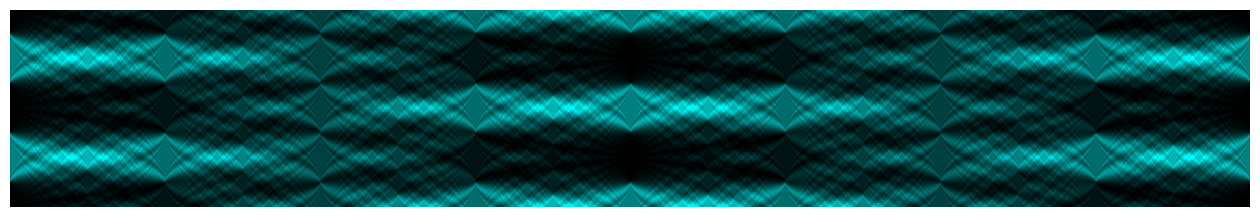

In [6]:
start_time = time.time()
fig, ax = plt.subplots(1,1,figsize=(16, 16),dpi=100)

ax.imshow(RGB)
ax.set_axis_off()
print("--- %s seconds ---" % (time.time() - start_time))

In [7]:
fig.savefig('Talbot1.png',bbox_inches='tight')